In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
cp = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
cp.shape

(205, 26)

# Data Cleaning

## Cek Skala Data

Langkah berikut dilakukan untuk memeriksa tipe data berdasarkan keterangan yang telah disidiakan.

In [4]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Pada keterangan diketahui bahwa symboling merupakan peringkat resiko asuransi yang berkisar antara  -3 sampai +3.
+3 menunjukkan bahwa resiko asuransi cukup tinggi dan -3 menunjuggan resiko asuransi rendah.
Hal ini menunjukkan bahwa variabel ini merupakan variabel kategorik akan tetapi dalam data variabel ini terbaca sebagai integer atau variabel numerik

In [5]:
cp['symboling'].head()

0    3
1    3
2    1
3    2
4    2
Name: symboling, dtype: int64

In [6]:
cp['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

Berdasarkan hasil di atas terlihat bahwa penyebab variabel `symboling` terbaca sebagai integer karena nilai dari variabel ini berupa angka. Untuk menyesuaikan tipe data ini maka dilakukan pengubahan tipe data dengan cara sebagai berikut

In [7]:
cp['symboling'] = cp['symboling'].astype('object')

Memeriksa hasil perubahan data

In [8]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Missing Value

In [9]:
cp.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Tidak terdapat nilai hilang dalam data.

## Duplikat

pemeriksaan duplikat dilakukan untuk memeriksa adanya pengulangan secara spesifik antar baris dalam dataset

In [10]:
cp.duplicated().sum()

0

tidak terdapat outliers

## Outliers dan Anomaly

In [11]:
num = cp.select_dtypes(exclude = 'object')
num.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


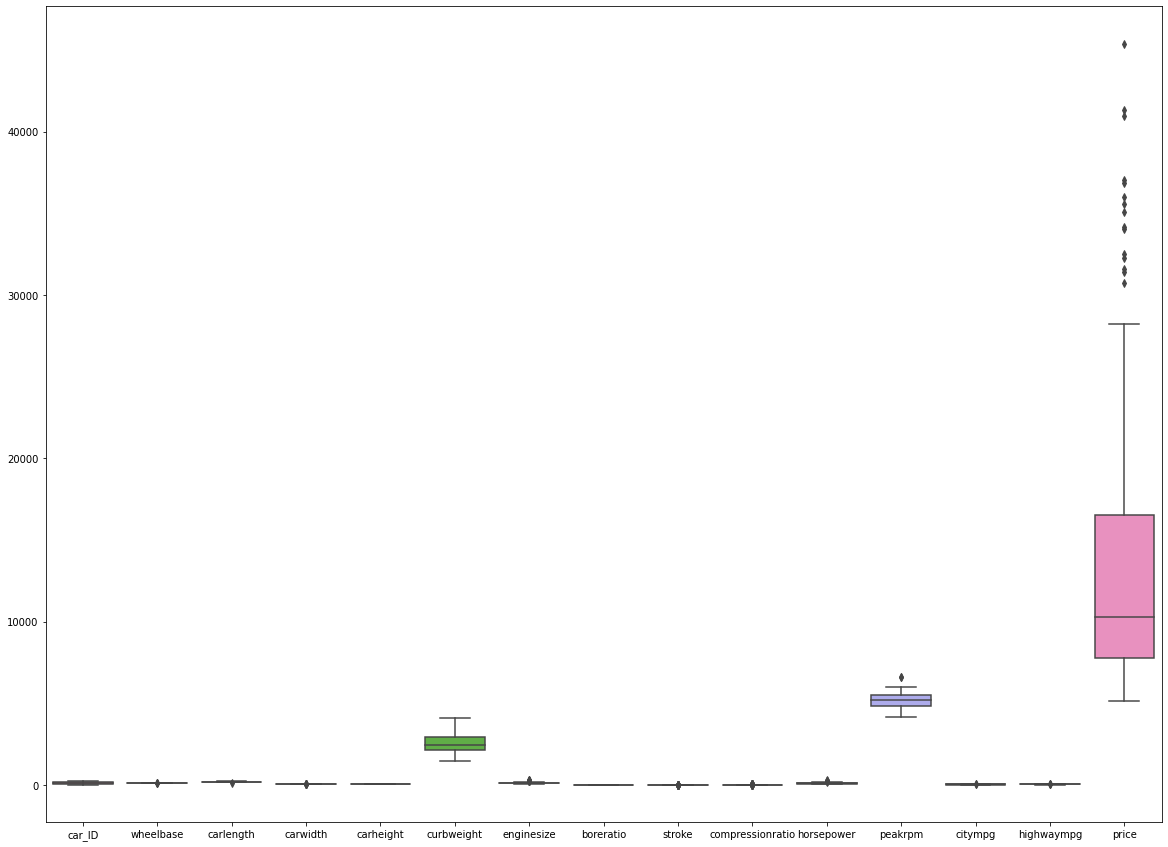

In [12]:
plt.figure(figsize=(20,15))
sns.boxplot(data = num)
plt.show()

berdasarkan boxplot di atas terlihat bahwa terdapat beberapa outlier dalam data. Berikut outlier dalam setiap variabel

In [13]:
cols = num.columns
for i in cols:
    print(i)
    display(cp[(np.abs(stats.zscore(cp[i])) >= 3)])
    

car_ID


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


wheelbase


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.8,3.35,8.0,184,4500,14,16,40960.0


carlength


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


carwidth


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


carheight


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


curbweight


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


enginesize


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


boreratio


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


stroke


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
111,112,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0
113,114,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0
134,135,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040.0


compressionratio


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
63,64,0,mazda glc deluxe,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795.0
158,159,0,toyota corona,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898.0
159,160,0,toyota corolla,diesel,std,four,hatchback,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,38,47,7788.0
174,175,-1,toyota celica gt,diesel,turbo,four,sedan,fwd,front,102.4,...,110,idi,3.27,3.35,22.5,73,4500,30,33,10698.0
182,183,2,vokswagen rabbit,diesel,std,two,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,52,4800,37,46,7775.0
184,185,2,volkswagen model 111,diesel,std,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,52,4800,37,46,7995.0
187,188,2,volkswagen super beetle,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,68,4500,37,42,9495.0
192,193,0,volkswagen rabbit custom,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


horsepower


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5


peakrpm


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
165,166,1,toyota celica gt liftback,gas,std,two,sedan,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9298.0
166,167,1,toyota corolla tercel,gas,std,two,hatchback,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9538.0


citympg


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0
30,31,2,honda civic,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479.0
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099.0


highwaympg


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0
30,31,2,honda civic,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479.0


price


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


Pada hasil di atas terdapat beberapa outlier. akan tetapi outliers ini bukan merupakan kejanggalan. Artinya terjadinya outlier ini merupakan hal yang wajar sebagai akibat dari perbedaan yang cukup jauh dari pengamatan tertentu terhadap pengamatan lainnya, misalnya pada wheelbase, terdapat outlier pada mobil dengan wheelbase 120.9, akan tetapi hal ini bukanlah masalah karena perbedaan panjang wheelbase adalah hal yang wajar tergantu spesifikasi mobil

# Eksplorasi

Berikut adalah nilai statistika deskriptif dari seluruh variabel numerik. dari sini dapat diketahui bahwa rata-rata harga mobil adalah `$`13276.71  dengan harga minimal   `$`5118 dan maksimal `$`45400.

In [14]:
num.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Korelasi Numerik

Langkah berikut dilakukan untuk mengetahui korelasi antar variable khususnya pengaruh varibel terhadap harga. Dalam hal ini variabel dengan korelasi antara -0.3 sampai 0.3 dianggap memiliki korelasi yang sangat lemah sehingga variabel ini dianggap tidak berkorelasi sehingga dalam kasus ini nilai korelasinya diganti dengan 0 untuk mempermudah identifikasi variabel yang memiliki korelasi cukup kecil

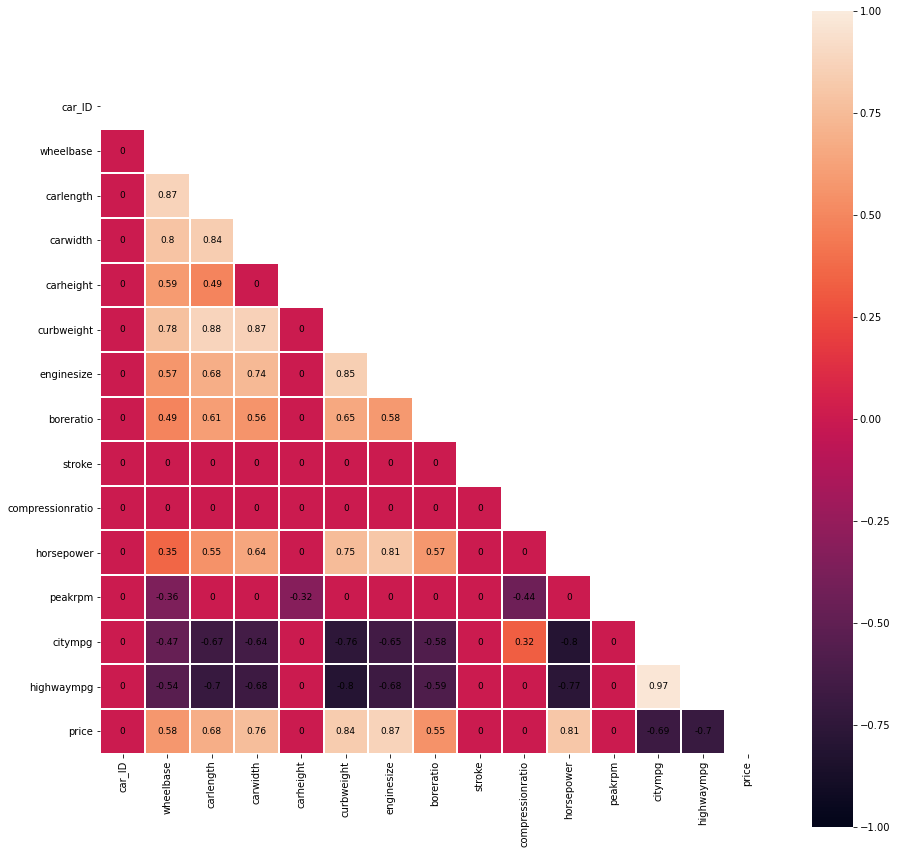

In [15]:
corr_mat = cp.corr()
# mengisi korelasi rendah dengan angka 0
corr_mat[(corr_mat < 0.3) & (corr_mat > -0.3)] = 0

mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(corr_mat, mask=mask, vmax=1.0, vmin=-1.0, annot=True, square=True, annot_kws={"size": 9, "color": "black"}, linewidths=0.1, cmap='rocket')
plt.savefig('korelasi X num terhadap Y.png')

In [16]:
corr_features = corr_mat['price'].drop(['price'])
corr_features.sort_values(ascending=False)

enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
car_ID              0.000000
carheight           0.000000
stroke              0.000000
compressionratio    0.000000
peakrpm             0.000000
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

hasil di atas adalah korlasi seluruh variabel terhadap variabel harga. berdasarkan hasil ini terlihat bahwa `car_ID`, `carheight`, `stroke`, `compressionratio` dan `peakrpm` memiliki pengaruh yang sangat lemah terhadap harga.

Dalam pemodelan regresi variabel ini tidak akan memberikan pengaruh yang besar terhadap akurasi model regresi sehingga untuk menyedarhanakan model variabel yang tidak berpengaruh dapat dihapus. Dengan langkah sebagai berikut.

In [17]:
corr_features[abs(corr_features) >= 0.3 ].sort_values(ascending=False).index.tolist()

['enginesize',
 'curbweight',
 'horsepower',
 'carwidth',
 'carlength',
 'wheelbase',
 'boreratio',
 'citympg',
 'highwaympg']

In [18]:
numerical_features = corr_features[abs(corr_features) >= 0.3 ].sort_values(ascending=False).index.tolist()

data_num = num.loc[:, numerical_features]
data_num.head()

,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,citympg,highwaympg
0,130,2548,111,64.1,168.8,88.6,3.47,21,27
1,130,2548,111,64.1,168.8,88.6,3.47,21,27
2,152,2823,154,65.5,171.2,94.5,2.68,19,26
3,109,2337,102,66.2,176.6,99.8,3.19,24,30
4,136,2824,115,66.4,176.6,99.4,3.19,18,22


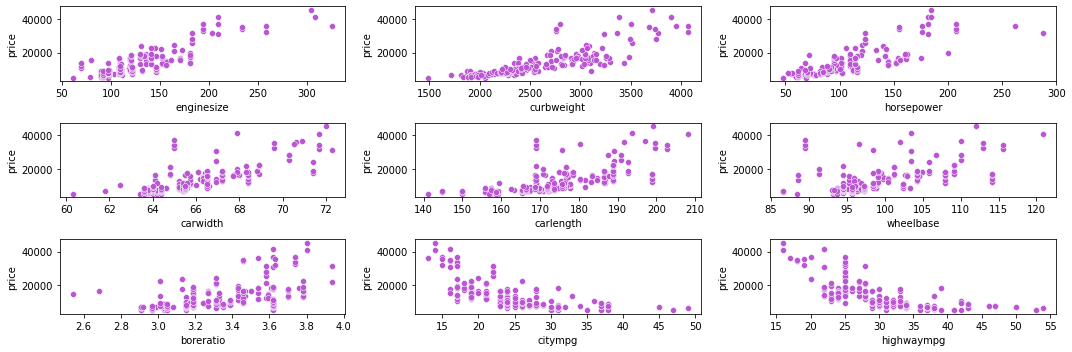

In [19]:
cols = data_num.columns
fig, axes = plt.subplots(3,3, figsize = (15,5))
a = 0
axes = axes.ravel()
for i in cols:
    if a < len(cols):
        sns.scatterplot(data = cp, x = cp[i], y = 'price', ax = axes[a], color='mediumorchid')
        a += 1
plt.tight_layout() 
plt.savefig('scatterplot X dan Y.png')

1. Dari seluruh variabel yang memiliki korelasi diatas 0.3 dengan harga variabel `enginesize`, `curbweight`, `horsepower`, `carwidth`, `carlength`, `wheelbase`, dan `boreratio` memiliki pengaruh positif terhadap harga maka peningkatan variabel ini akan meningkatkan harga. Jika ingin membeli mobil dengan harga lebih murah maka nilai variabel ini akan kecil
2. Selanjutnya variabel `citympg` dan `highwaympg` memiliki pengaruh negatif terhadap harga. Artinya jika membeli mobil dengan harga murah maka nilai variabel ini akan besar

## Kategorik

Menentukan *Brand* mobil berdasrkan nama mobil. Dalam hal ini dapat dilihat pada kata pertama `CarName`. Sehingga dilakukan pemotongan kategori `CarName` dengan kata pertama saja. 

In [20]:
cp['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [21]:
#mengubah tipe mobil menjadi brand saja
def extract_brand(str):
    return str.split(' ')[0]
cp['CarName'] = cp['CarName'].apply(extract_brand)
print(cp['CarName'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [22]:
cp['CarName'].replace({'maxda':'mazda', 'Nissan' : 'nissan', 'toyouta' : 'toyota', 'vw':'volkswagen', 'vokswagen' : 'volkswagen',
                      'porcshce' : 'porsche'}, inplace = True)

In [23]:
data_cat = cp.select_dtypes('object')

In [24]:
cols = data_cat.columns

for i in cols:
    print(cp[i].value_counts())

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
do

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# create a dataframe to store label encoded values
data_cat_le = data_cat.copy()

for i in data_cat.columns:
    le.fit(data_cat[i])
    data_cat_le[i] = le.transform(data_cat[i]).copy()

In [26]:
from sklearn.feature_selection import SelectKBest,f_classif
y = cp['price']
select = SelectKBest(f_classif)
select.fit(data_cat_le, y)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


SelectKBest()

In [27]:
p_values = pd.Series(select.pvalues_,index = data_cat.columns)
p_values.sort_values(ascending = True)

enginelocation    0.000000e+00
cylindernumber    7.388765e-09
fuelsystem        2.062501e-04
drivewheel        2.174127e-04
aspiration        2.833995e-04
carbody           5.629716e-03
CarName           4.661177e-02
doornumber        4.760354e-02
symboling         6.744775e-02
fueltype          1.973501e-01
enginetype        3.512990e-01
dtype: float32

### Variabel kategorik yang paling berpengaruh signifikan terhadap harga mobil

selain variabel dibawah ini memiliki pengaruh yang tidak terlalu signifikan terhadap penentuan harga mobil. sehingga variabel ini menjadi variabel yang harus diperhatikan dalam penentuan harga mobil.

In [28]:
p_values[abs(p_values) < 0.05 ].sort_values(ascending=False).index.tolist()

['doornumber',
 'CarName',
 'carbody',
 'aspiration',
 'drivewheel',
 'fuelsystem',
 'cylindernumber',
 'enginelocation']

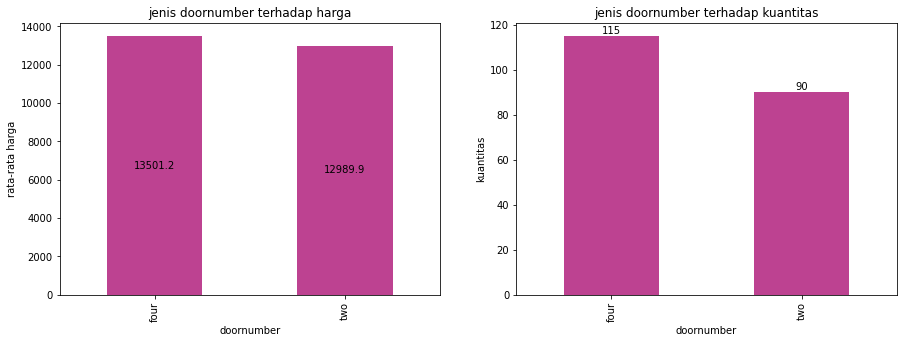

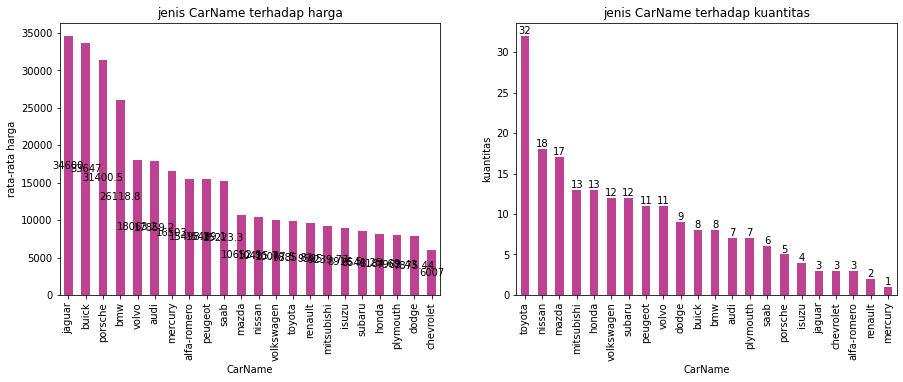

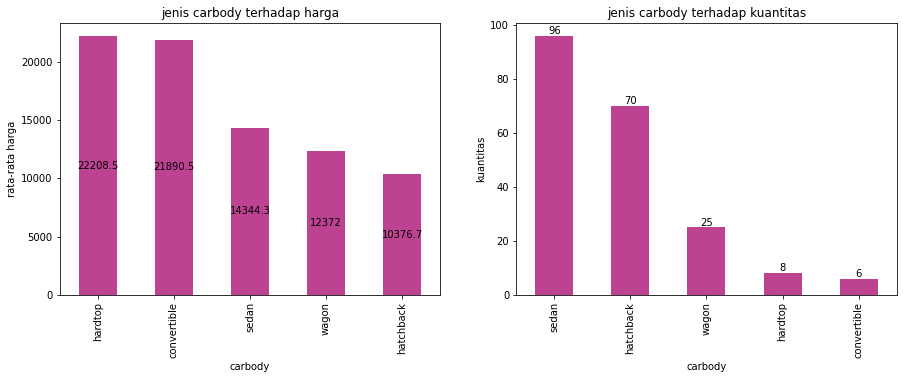

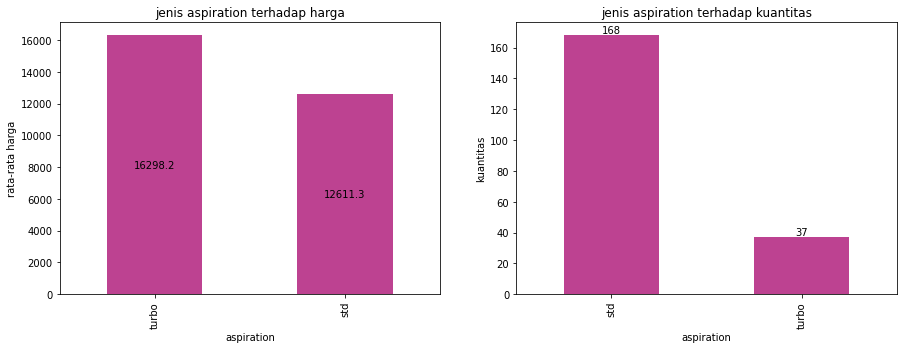

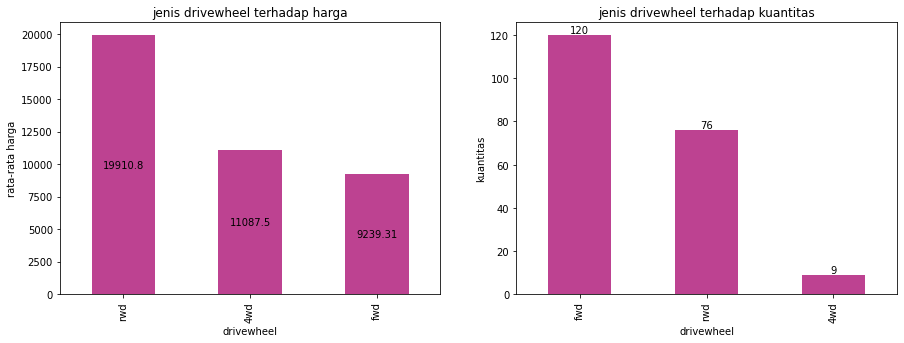

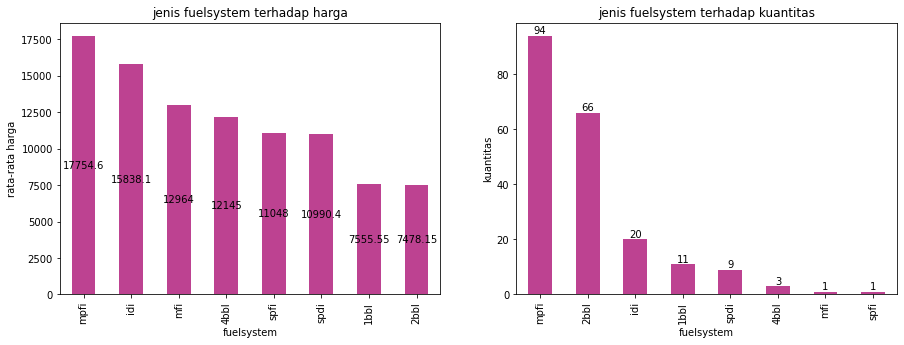

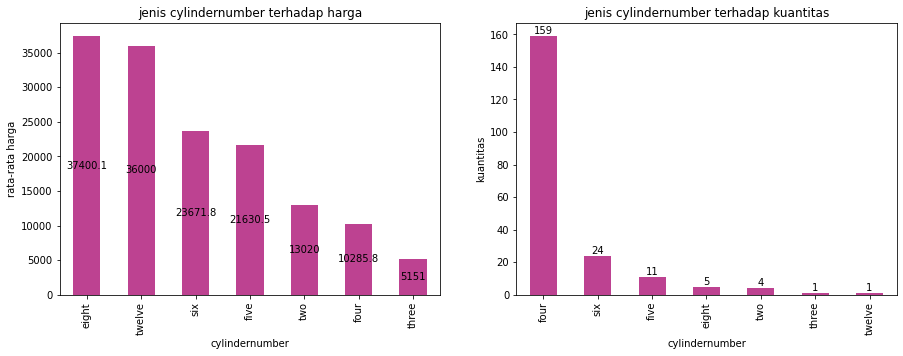

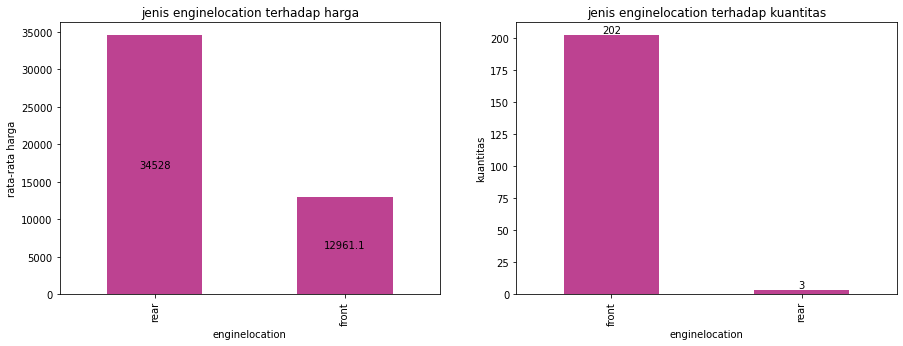

In [29]:
cols = p_values[abs(p_values) <= 0.05 ].sort_values(ascending=False).index.tolist()
for a in cols:
    fig,axes = plt.subplots(1,2, figsize = (15,5))
    ax = cp.groupby(a)['price'].mean().sort_values(ascending=False).plot(kind = 'bar', ax = axes[0], color = '#BD4291')
    ax.bar_label(ax.containers[0], label_type='center')
    axes[0].set( xlabel = a, ylabel = 'rata-rata harga', title = f'jenis {a} terhadap harga')
    ax1 = cp.groupby(a)['car_ID'].count().sort_values(ascending=False).plot(kind = 'bar', ax = axes[1], color = '#BD4291')
    ax1.bar_label(ax1.containers[0])
    axes[1].set( xlabel = a, ylabel = 'kuantitas', title = f'jenis {a} terhadap kuantitas')
    plt.show()

1. mobil dengan `doornumber` 4 mobil kategori in ijuga cukup diminati di pasar amerika. 
2. mobil dengan `brand` jaguar, buick serta porsche, akan tetapi mobil yang paling diminati justru mobil dengan brand toyota. 
3. `carbody` mobil dengan kategori hardtop dan convertible memiliki rata-rata harga tertinggi namun yang paling diminati di pasar adalah mobil dengan `carbody` sedan.
4. mobil dengan `aspiration` turbo juga memiliki rata-rata harga lebih mahal dibanding std tetapi mobil std lebih diminati. 
5. mobil dengan `drivewheel` rwd memiliki rata-rata tertinggi tetapi mobil yang paling banyak di pasaran adalah mobil dengan `drivewheel` fwd meski demikian mobil dengan kategori rwd juga cukup diminati meski rata-rata harganya tinggi. 
6. `fuelsystem` mobil dengan tipe mpfi memiliki harga rata-rata paling mahal juga paling di pasaran
7. mobil dengan rata-rata harga termahal memiliki `cylindernumber` eight tatapi mobil yang paling banyak dipasaran adalah mobil dengan `cylindernumber` four.
8. Mobil dnegan `enginelocation` rear memiliki harga paling mahal tetapi yang paling banyak dipasaran adalah mobil dengan `enginelocation` front.

### Identifikasi kisasran harga pada setiap brand

kategori harga dibuat untuk mengetahui harga yang ditetapkan masuk dalam kategori mahal atau murah. Dalam hal ini yang dikategorikan mobil mahal adalah mobil dengan harga di atas rata-rata harga mobil. sedangkan jika dibawah atau sama dengan rata-rata disebut mobil standard.

In [59]:
cp['price_category'] = cp['price'].apply(lambda x : 'standard' if x <= cp['price'].mean() else 'mahal' )

In [60]:
cp['price_category'].value_counts()

standard    129
mahal        76
Name: price_category, dtype: int64

terdapat 76 mobil dengan harga diatas rata-rata, sisanya memiliki harga dibawah atau sama dengan rata-rata

[Text(0.5, 17.200000000000003, 'Brand'),
 Text(17.200000000000017, 0.5, 'proporsi'),
 Text(0.5, 1.0, 'proporsi brand mobil mahal dan standard')]

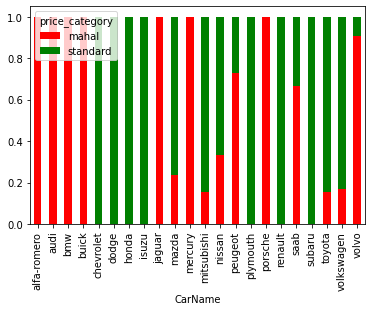

In [32]:
pd.crosstab(cp['CarName'], cp['price_category'],  normalize='index').plot.bar(stacked = True, color = ['r','g'])
ax.set( xlabel = 'Brand', ylabel = 'proporsi',
            title = 'proporsi brand mobil mahal dan standard')

1. Brand `alfa-romero`, `audi`, `bmw`, `jaguar`, `porsche` dan `buick` hanya mengeluarkan mobil dengan harga diatas rata-rata
2. Brand `chevrolet`, `dodge`, `honda`, `isuzu`, `renaut` dan `subaru` hanya mengeluarkan mobil dengan harga standard atau murah.
3. Brand `peaugeot` , `saab` dan `volvo` lebih banyak mengelurakan mobil dengan harga di atas rata-rata.
4. Brand lainnya lebih banyak membuat mobil dengan harga dibawah rata-rata.

# Modeling 

## One Hot Encoding

In [33]:
carp = pd.get_dummies(data = cp, columns = cp.select_dtypes('object').columns)
carp.drop('car_ID', axis = 1, inplace = True)
carp.head()

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price_category_mahal,price_category_standard
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,1,0,0,1,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,1,0,0,1,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,1,0,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,1,0,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,1,0,0,1,0


## membandingkan akurasi model yang menggunakan seluruh variabel prediktor dengan variabel yang hanya menggunakan variabel prediktor berpengaruh.

melakukan train, test split untuk data lengkap dengan ukuran test sebesar 0.3 dan train sebesar 0.7

In [34]:
x = carp.drop('price', axis = 1)
y = cp['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3,
                                                   random_state=1)


In [35]:
# Model regresi linier dengan variabel lengkap
f_model = linear_model.LinearRegression()
f_model.fit(X_train, y_train)
y_pred = f_model.predict(X_test)

### Menghapus variabel dengan korelasi dibawah 0.3

In [36]:
numerical_features = corr_features[abs(corr_features) >= 0.3 ].sort_values(ascending=False).index.tolist()

data_num = num.loc[:, numerical_features]
data_num.head()

,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,citympg,highwaympg
0,130,2548,111,64.1,168.8,88.6,3.47,21,27
1,130,2548,111,64.1,168.8,88.6,3.47,21,27
2,152,2823,154,65.5,171.2,94.5,2.68,19,26
3,109,2337,102,66.2,176.6,99.8,3.19,24,30
4,136,2824,115,66.4,176.6,99.4,3.19,18,22


### menghapus variabel yang tidak berpengaruh signifikan

In [37]:
kat_features = p_values[abs(p_values) <= 0.05 ].sort_values(ascending=False).index.tolist()
data_kat = data_cat.loc[:, kat_features]
data_kat.head()

,doornumber,CarName,carbody,aspiration,drivewheel,fuelsystem,cylindernumber,enginelocation
0,two,alfa-romero,convertible,std,rwd,mpfi,four,front
1,two,alfa-romero,convertible,std,rwd,mpfi,four,front
2,two,alfa-romero,hatchback,std,rwd,mpfi,six,front
3,four,audi,sedan,std,fwd,mpfi,four,front
4,four,audi,sedan,std,4wd,mpfi,five,front


melakukan one hot encoding untuk variabil kategorik yang terpilih.

In [38]:
code = pd.get_dummies(data_kat)

menyatukan variabel prediktor baik numerik dan kategorik yang telah di encoding kemudian membagi train test dengan ukuran yang sama dengan sebelumnya.

In [39]:
X = pd.concat((data_num, code), axis = 1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size= 0.3,
                                                    random_state=1)

In [40]:
#Model regresi linier dengan beberapa variabel tidak berpengaruh telah dihapus
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train1, y_train1)
y_pred1 = lr_model.predict(X_test1)

## Evaluasi
Melakukan evaluasi model terhadap model yang telah terbentuk sebelumnya. pemeriksaan dilakukan dengan menggunakan MSE, MAE dan R2

In [41]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as r2
print("Model\t\t\t RMSE \t\t\t MSE \t\t MAE \t\t\t R2")
print("""fmod LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            MSE(y_test, y_pred, squared = False), MSE(y_test, y_pred),
            MAE(y_test, y_pred), r2(y_test, y_pred)))
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            MSE(y_test1, y_pred1, squared = False), MSE(y_test1, y_pred1),
            MAE(y_test1, y_pred1), r2(y_test1, y_pred1)))

Model			 RMSE 			 MSE 		 MAE 			 R2
fmod LinearRegression 	 2474.53 		 6123292.10 	1634.97 		0.90
LinearRegression 	 2642.95 		 6985171.91 	1731.82 		0.88


Karena model tanpa dihapus lebih baik dibanding model yang hanya menggunakan variabel berpengaruh, maka model yang digunakan sebagai base adalah model regresi linier dengan seluruh variabel

## Mencoba model Ridge dan Lasso

In [42]:
# Ridge Regression
ridge_model = linear_model.Ridge()
ridge_model.fit(X_train, y_train)
y_pred2 = ridge_model.predict(X_test)
# Lasso Regression
ls_model = linear_model.Lasso()
ls_model.fit(X_train, y_train)
y_pred3 = ls_model.predict(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.902e+07, tolerance: 9.238e+05
  model = cd_fast.enet_coordinate_descent(


### Evaluasi model lasso dan Ridge

In [43]:
print("Model\t\t\t RMSE \t\t\t MSE \t\t MAE \t\t\t R2")
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            MSE(y_test, y_pred2, squared = False),MSE(y_test, y_pred2),
            MAE(y_test, y_pred2), r2(y_test, y_pred2)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            MSE(y_test, y_pred3, squared = False), MSE(y_test, y_pred3),
            MAE(y_test, y_pred3), r2(y_test, y_pred3)))

Model			 RMSE 			 MSE 		 MAE 			 R2
RidgeRegression 	 2341.63 		 5483228.34 	1524.12 		0.91
LassoRegression 	 2468.28 		 6092428.82 	1581.11 		0.90


Model Ridge lebih baik dibanding dengan model regresi linier dan regresi lasso

## Plot residual error pada training dan testing

### Linear regression

Variance score: 0.8985716544322558


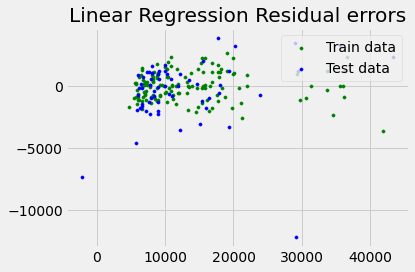

In [44]:
print('Variance score: {}'.format(f_model.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## membuat plot residual error pada train
plt.scatter(f_model.predict(X_train), f_model.predict(X_train) - y_train,
            color = 'green', s = 10, label = 'Train data')
 
## membuat plot residual error pada test
plt.scatter(f_model.predict(X_test), f_model.predict(X_test) - y_test,
            color = 'blue', s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## membuat posisi legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title('Linear Regression Residual errors')
# menyimpan gambar
plt.tight_layout() 
plt.savefig('Linear Regression Residual errors.jpg')
 
## method call for showing the plot
plt.show()

### Ridge Regression

Variance score: 0.9091738936493639


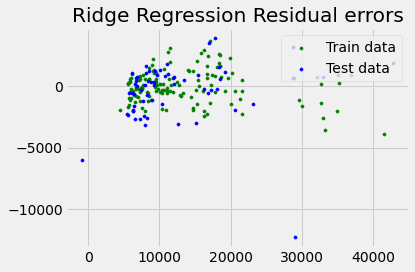

In [45]:
print('Variance score: {}'.format(ridge_model.score(X_test, y_test)))
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## membuat plot error pada train data
plt.scatter(ridge_model.predict(X_train), ridge_model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## membuat plot error pada test data
plt.scatter(ridge_model.predict(X_test), ridge_model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## Posisi legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Ridge Regression Residual errors")
## Menyimpan plot
plt.tight_layout() 
plt.savefig('Ridge Regression Residual errors.jpg')
## method call for showing the plot
plt.show()

# Lasso Regression

Variance score: 0.8990828844700077


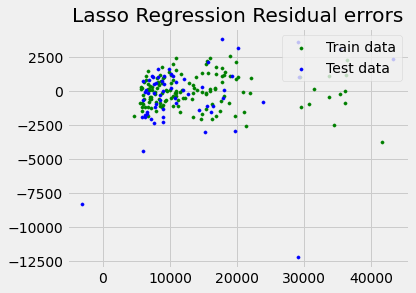

In [46]:
print('Variance score: {}'.format(ls_model.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## Membuat plot error pada train data
plt.scatter(ls_model.predict(X_train), ls_model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## membuat plot error pada test data
plt.scatter(ls_model.predict(X_test), ls_model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## posisi legend
plt.legend(loc = 'upper right')
 
## plot title
plt.tight_layout() 
plt.title("Lasso Regression Residual errors")
plt.savefig('Lasso Regression Residual errors.jpg')
 
## method call for showing the plot
plt.show()

Error pada train dan test tidak berbeda jauh baik pada model regresi linear, ridge dan lasso. Sehingga model tidak menunjukkan adanya overfitting. Selain itu evaluasi model regresi linier yang menunjukkan nilai cukup baik menunjukkan bahwa tidak terjadi underfitting.

# Regularized Regression

Untuk mengatasi indikasi adanya overfit dan underfit pada model dilakukan regularized regression. Dengan memberikan penalti pada variabel yang tidak signifikan.

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def k_fold_eval(model):
    kf = KFold(n_splits = 5)
    RMSE_length = 5
    RMSE_list = []
    
    for i, (train, val) in enumerate(kf.split(X_train)):
        train_features = X_train.iloc[train]
        train_target = y_train.iloc[train]
        
        val_features = X_train.iloc[val]
        val_target = y_train.iloc[val]
        
        ml_model = model.fit(train_features, train_target)
        prediction = ml_model.predict(val_features)
        
        rmse_score = np.sqrt(MSE(val_target, prediction))
        RMSE_list.append(rmse_score)
        
    print('RMSE Scores:')
    print(RMSE_list)
    print('')
    print(f'Average RMSE Score: {np.mean(RMSE_list)}')
    print('')
    
    ml_model_final = model.fit(X_train, y_train)
    test_prediction = ml_model_final.predict(X_test)
    rmse_final = np.sqrt(MSE(y_test, test_prediction))
    r2_scorefinal = r2(y_test, test_prediction)
    
    print(f'RMSE Evaluate on Test Set: {rmse_final}')
    print(f'R2 Evaluate on Test Set: {r2_scorefinal}')
    return ml_model_final

In [48]:
linear_reg = k_fold_eval(linear_model.LinearRegression())

RMSE Scores:
[1717.3447227000765, 2582.9765621902793, 3553.433188316362, 2131.0451273232316, 3235.004358728462]

Average RMSE Score: 2643.960791851682

RMSE Evaluate on Test Set: 2474.5286614193637
R2 Evaluate on Test Set: 0.8985716544322558


In [49]:
red_reg = k_fold_eval(linear_model.Ridge())

RMSE Scores:
[2238.939958301857, 2383.2677413797783, 2164.0621321059584, 2603.759097705434, 1879.549786900475]

Average RMSE Score: 2253.915743278701

RMSE Evaluate on Test Set: 2341.629420391564
R2 Evaluate on Test Set: 0.9091738936493639


In [50]:
lasso_reg = k_fold_eval(linear_model.Lasso())

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.788e+07, tolerance: 7.131e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.723e+07, tolerance: 8.190e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.437e+07, tolerance: 

RMSE Scores:
[1735.242534402241, 2371.607840470891, 3301.3421304894114, 2177.439069704581, 3309.778663677408]

Average RMSE Score: 2579.082047748906

RMSE Evaluate on Test Set: 2468.284590945951
R2 Evaluate on Test Set: 0.8990828844700077


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.902e+07, tolerance: 9.238e+05
  model = cd_fast.enet_coordinate_descent(


nilai R2, RMSE dan MAE pada seluruh model tidak meningkat setelah dilakukan regularized regression artinya langkah ini tidak ampuh untuk memperbaiki model

##  Mencoba model Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor
base_model = RandomForestRegressor(n_estimators = 100)
base_model.fit(X_train, y_train)

base_pred = base_model.predict(X_test)
print("Model\t\t\t\t RMSE \t\t\t MSE \t\t\t MAE \t\t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
           MSE(y_test, base_pred, squared = False), MSE(y_test, base_pred),
            MAE(y_test, base_pred), r2(y_test, base_pred)))

Model				 RMSE 			 MSE 			 MAE 			 R2
Random Forest Regressor 	 1780.13 		 3168871.45 		1115.12 		0.95


Variance score: 0.947509708256244


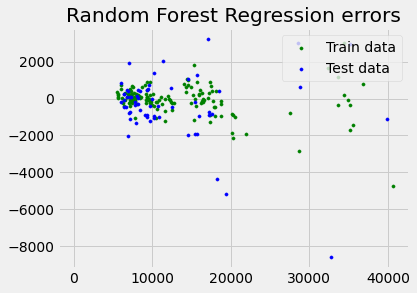

In [72]:
print('Variance score: {}'.format(base_model.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## Membuat plot error pada train data
plt.scatter(base_model.predict(X_train), base_model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## membuat plot error pada test data
plt.scatter(base_model.predict(X_test), base_model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## posisi legend
plt.legend(loc = 'upper right')
 
## plot title
plt.tight_layout() 
plt.title("Random Forest Regression errors")
plt.savefig('Random Forest Regression errors.jpg')
 
## method call for showing the plot
plt.show()

# Random Forest Tuning

In [53]:
base_rmse = MSE(y_test, base_pred, squared = False)

In [54]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [55]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, cv = 5, verbose=3, random_state=42, n_jobs=-1,
                              return_train_score=True)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True, verbose=3)

In [56]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100}

In [57]:
new_pred = rf_random.best_estimator_.predict(X_test)
new_rmse = MSE(y_test, new_pred, squared = False)
print('New Model has RMSE:', new_rmse)
print('New Model has R2-Score:', r2(y_test, new_pred))

New Model has RMSE: 2016.9488789602235
New Model has R2-Score: 0.9326148582231742


In [58]:
print('Improvement of:', ((base_rmse - new_rmse)/base_rmse)*100, '%')

Improvement of: -10.410054300273602 %


Tuning tidak berhasil memperbaiki model

#  Kesimpulan
Berdasrakan seluruh model yang digunakan model terbaik yang dapat digunakan adalah model random forest regression dengan nilai RMSE = 1754.38, MAE = 1088.45 dan R2 = 95%. Sehingga model yang disarankan dalam prediksi ini adalah random forest.

Selain itu dalam penentuan harga mobil tidak semua variabel berpengaruh terhadap penentuan harga. Dalam hal ini terdapat beberap variabel yang harus diperhatikan yaitu 'enginesize', 'curbweight','horsepower','carwidth', 'carlength', 'wheelbase','boreratio','citympg','highwaympg', 'doornumber','CarName','carbody','aspiration','drivewheel','fuelsystem', 'cylindernumber' dan'enginelocation'.

Selain itu jika dilihat dari brand, memang terdapat beberapa brand yang hanya mengularkan mobil di ataas rata-rata atau dibawah rata-rata harga